___
<h1 style="color:blue;">Logistic Regression</h1>

___
 

## Introduction to Logistic Regression

Logistic Regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is a binary variable (0/1, True/False, Yes/No). Logistic Regression is used to model the probability of a certain class or event.

### Key Concepts

- **Dependent Variable (Y):** The binary variable we are trying to predict (whether an employee left the company or not).
- **Independent Variables (X):** The variables that are used to predict the dependent variable.
- **Logistic Function:** The logistic function is used to model the binary dependent variable.
- **Odds Ratio:** The ratio of the probability of an event occurring to the probability of it not occurring.

### The Logistic Regression Equation

The equation for logistic regression is:

$$ P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n)}} $$

Where:
- $P(Y=1|X)$ is the probability of the dependent variable being 1 given the independent variables X.
- $\beta_0, \beta_1, \beta_2, ..., \beta_n$ are the coefficients of the model.
- $X_1, X_2, ..., X_n$ are the independent variables.
- $e$ is the base of the natural logarithm.
- The logistic function $f(x) = \frac{1}{1 + e^{-x}}$ is used to model the binary dependent variable.
- The logistic function outputs values between 0 and 1, which can be interpreted as probabilities.
- The coefficients $\beta_0, \beta_1, \beta_2, ..., \beta_n$ are estimated using maximum likelihood estimation.

## Assumptions of Logistic Regression

1. **Binary Outcome:** The dependent variable should be binary.
2. **Independence:** Observations are independent of each other.
3. **Linearity:** The log odds of the outcome is linearly related to the independent variables.
4. **No Multicollinearity:** Independent variables should not be highly correlated.


## Data 

The dataset includes the following attributes:

- **Satisfaction Level:** Employee satisfaction level.
- **Last Evaluation:** Last performance evaluation score.
- **Number of Projects:** Number of projects the employee has worked on.
- **Average Monthly Hours:** Average monthly working hours.
- **Time Spent at Company:** Number of years the employee has been with the company.
- **Work Accident:** Whether the employee has had a work accident (1: Yes, 0: No).
- **Left:** Whether the employee has left the company (1: Yes, 0: No).
- **Promotion in Last 5 Years:** Whether the employee has been promoted in the last five years (1: Yes, 0: No).
- **Department:** Department the employee belongs to.
- **Salary:** Salary level (Low, Medium, High).

## Target Variable

The target variable is **Left**, which indicates whether an employee has left the company (1) or not (0).

## Data Source

The dataset is publically available on Kaggle and can be found [here](https://www.kaggle.com/datasets/manidevesh/hr-dataset-analysis).



___
## <span style="color:blue;">Data Analysis</span>

___

## Descriptive Analysis
- **Objective:** Summarize and describe the main features of a dataset.
- **Techniques:** Measures of central tendency (mean, median, mode), measures of variability (range, variance, standard deviation), and frequency distributions.
- **Usage:** Provides a simple summary about the sample and measures. It helps in understanding the basic features of the data.

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

# Importing the dataset
df = pd.read_csv('HR_DataSet.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
# Checking for missing values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [3]:
# data insights
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
# Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# Converting categorical variables to numerical
df['Department'] = df['Department'].astype('category').cat.codes
df['salary'] = df['salary'].astype('category').cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  int8   
 9   salary                 14999 non-null  int8   
dtypes: float64(2), int64(6), int8(2)
memory usage: 966.9 KB


> As data is already cleaned, we will directly move to the Exploratory Data Analysis part.

## Exploratory Data Analysis (EDA)
- **Objective:** Explore the data to find patterns, relationships, or anomalies.
- **Techniques:** Data visualization (scatter plots, histograms, box plots), correlation analysis, and outlier detection.
- **Usage:** Helps in understanding the underlying structure of the data and formulating hypotheses for further analysis.

In [6]:
# Finiding the unique values in the dataset
df.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Department                10
salary                     3
dtype: int64

>  Making Histograms of the data to understand the distribution of the data.

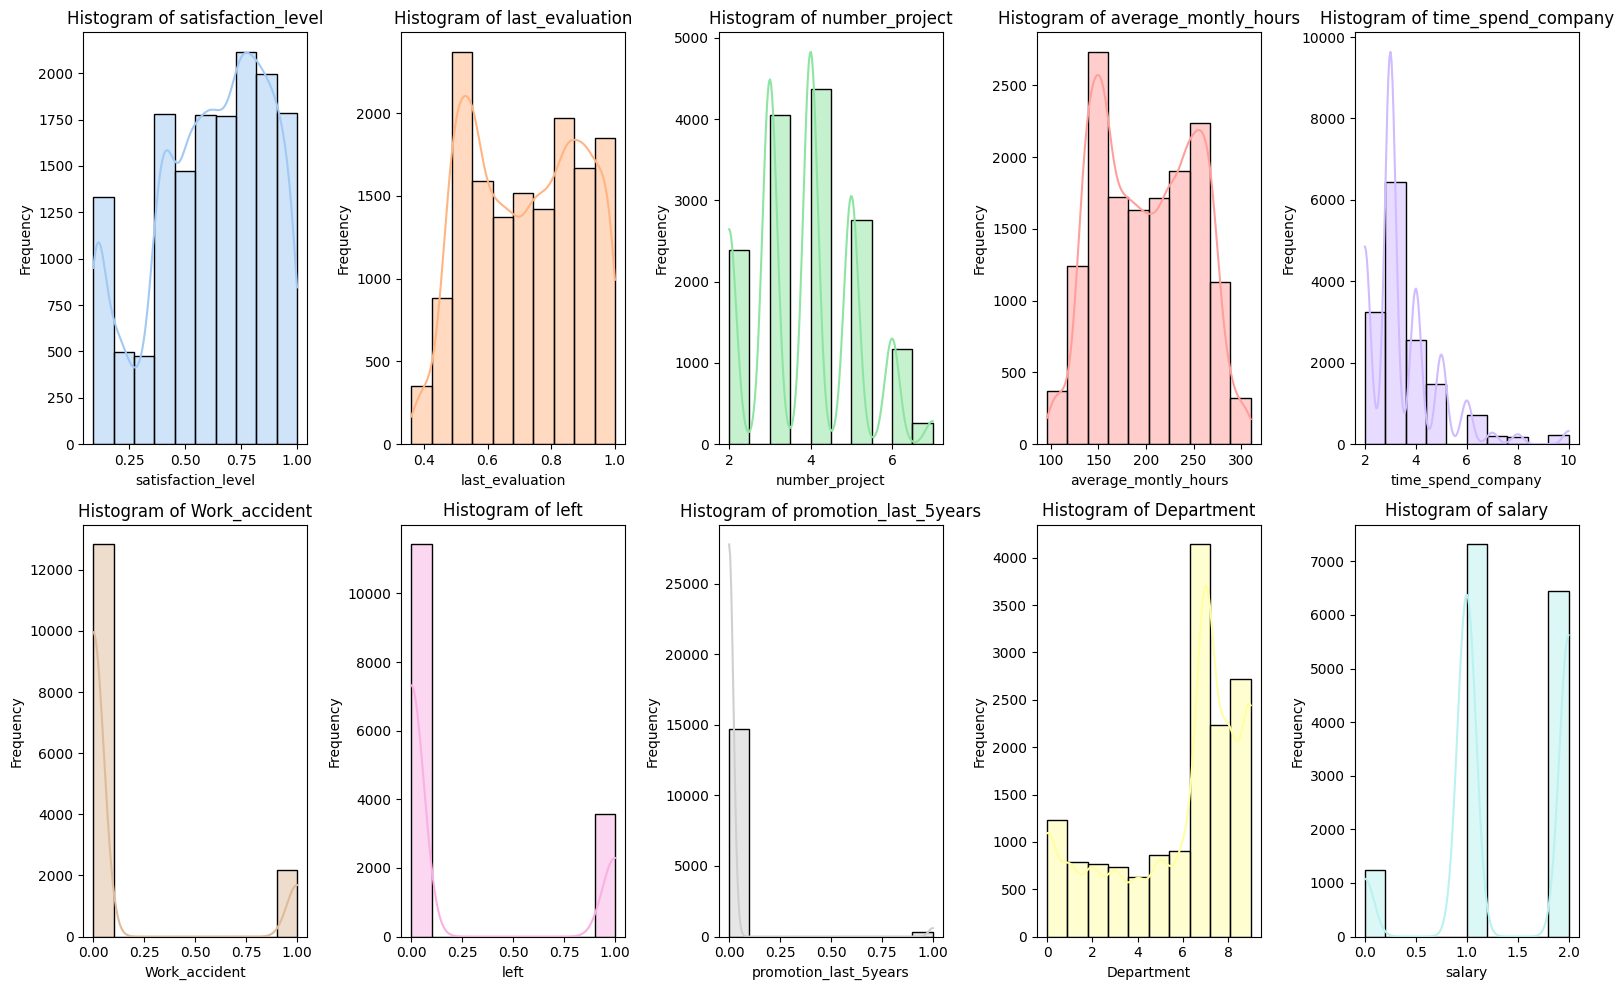

In [7]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 10))

# Define a color palette with different colors for each column
palette = sns.color_palette('pastel', len(df.columns))

# Iterate through each column and plot a histogram with a different color
for i, col in enumerate(df.columns):
    plt.subplot(2, 5, i + 1)
    sns.histplot(df[col], bins=10, kde=True, color=palette[i], edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

> Making box plots to understand the spread of the data.

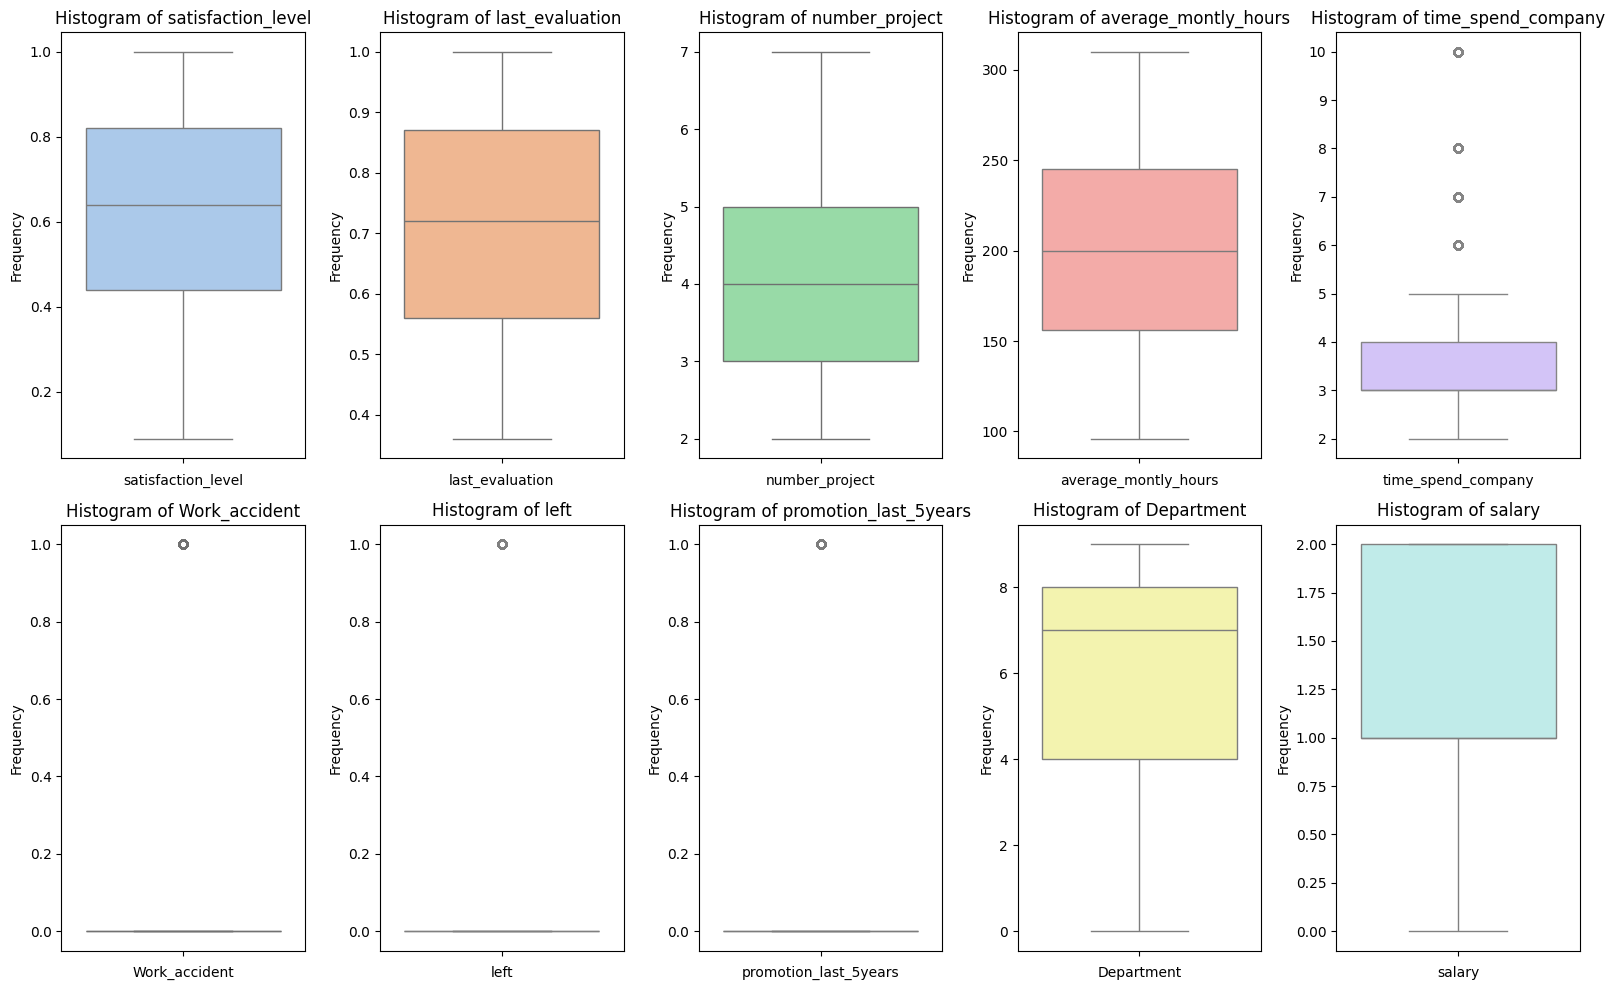

In [8]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 10))

# Define a color palette with different colors for each column
palette = sns.color_palette('pastel', len(df.columns))

# Iterate through each column and plot a histogram with a different color
for i, col in enumerate(df.columns):
    plt.subplot(2, 5, i + 1)
    sns.boxplot(df[col], color=palette[i])
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

> Making boxen plots to understand the spread of the data.

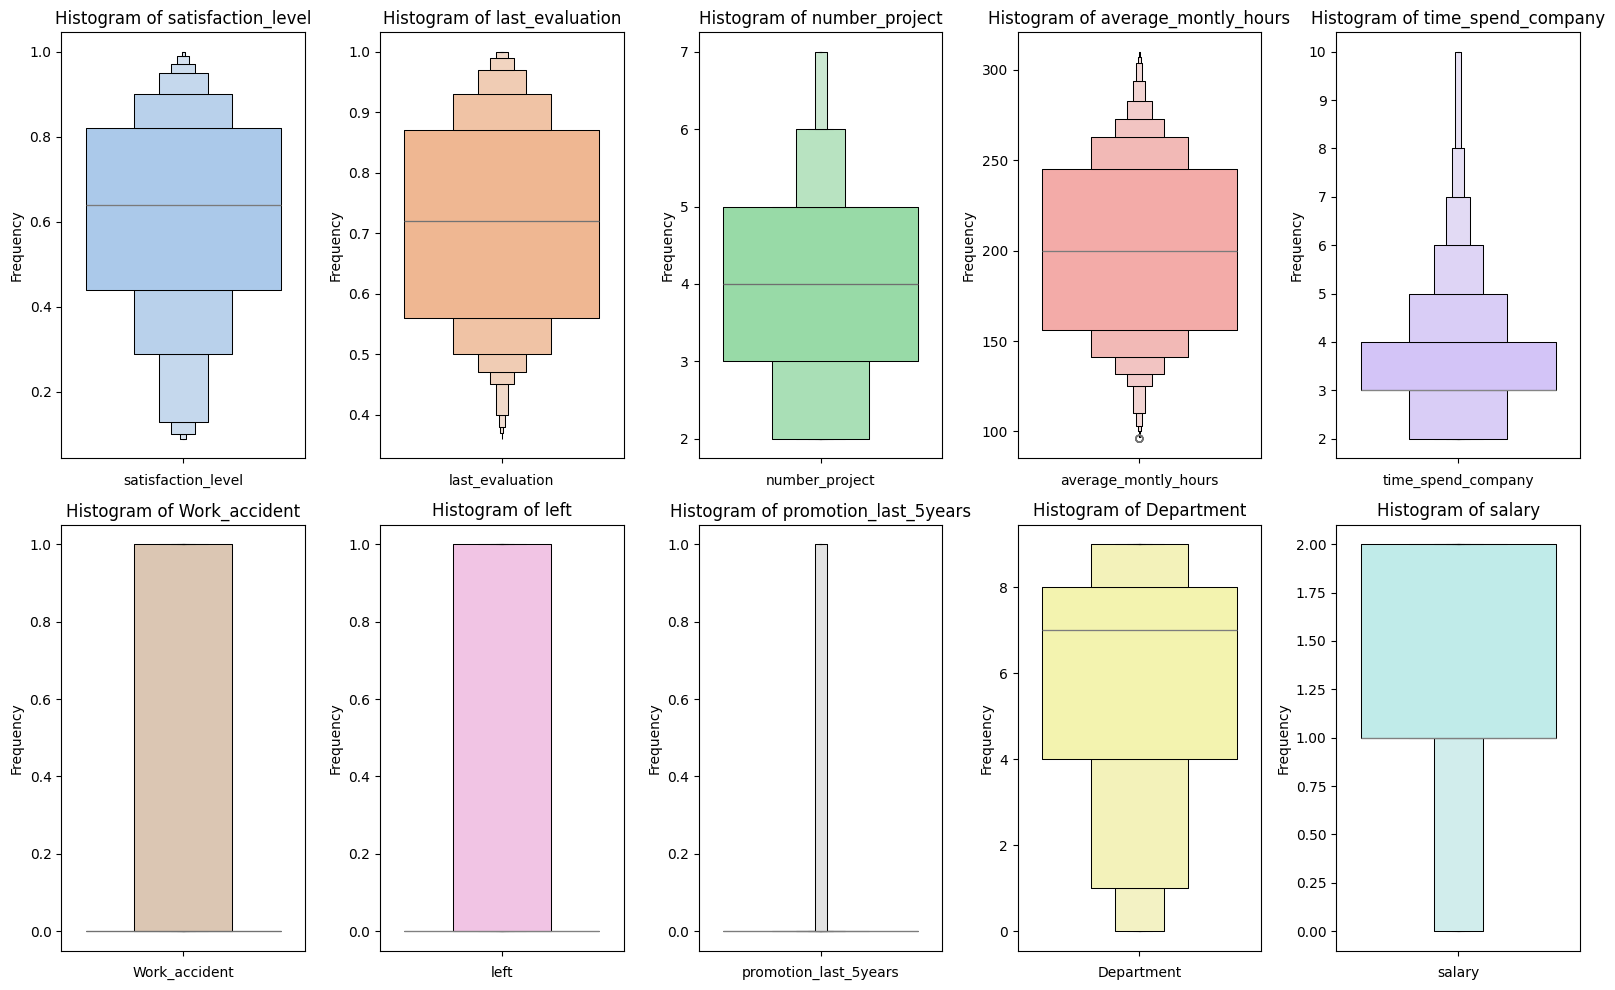

In [9]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 10))

# Define a color palette with different colors for each column
palette = sns.color_palette('pastel', len(df.columns))

# Iterate through each column and plot a histogram with a different color
for i, col in enumerate(df.columns):
    plt.subplot(2, 5, i + 1)
    sns.boxenplot(df[col], color=palette[i], edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

> Making boxen plots to understand the spread of the data.

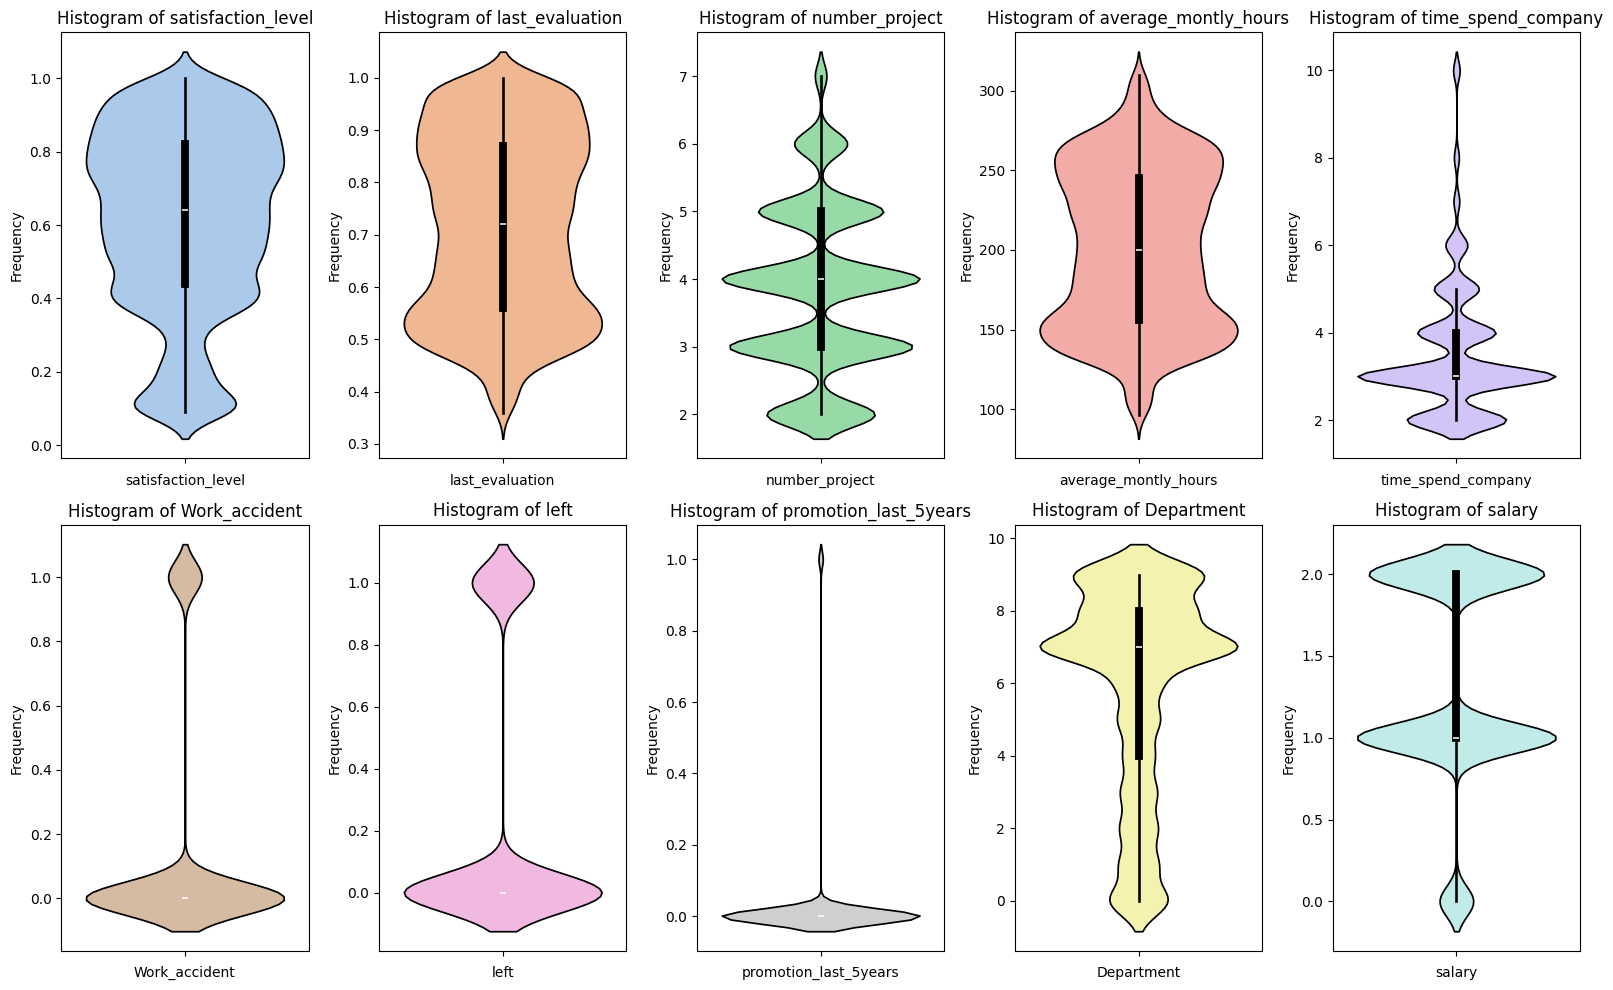

In [10]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 10))

# Define a color palette with different colors for each column
palette = sns.color_palette('pastel', len(df.columns))

# Iterate through each column and plot a histogram with a different color
for i, col in enumerate(df.columns):
    plt.subplot(2, 5, i + 1)
    sns.violinplot(df[col], color=palette[i], edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

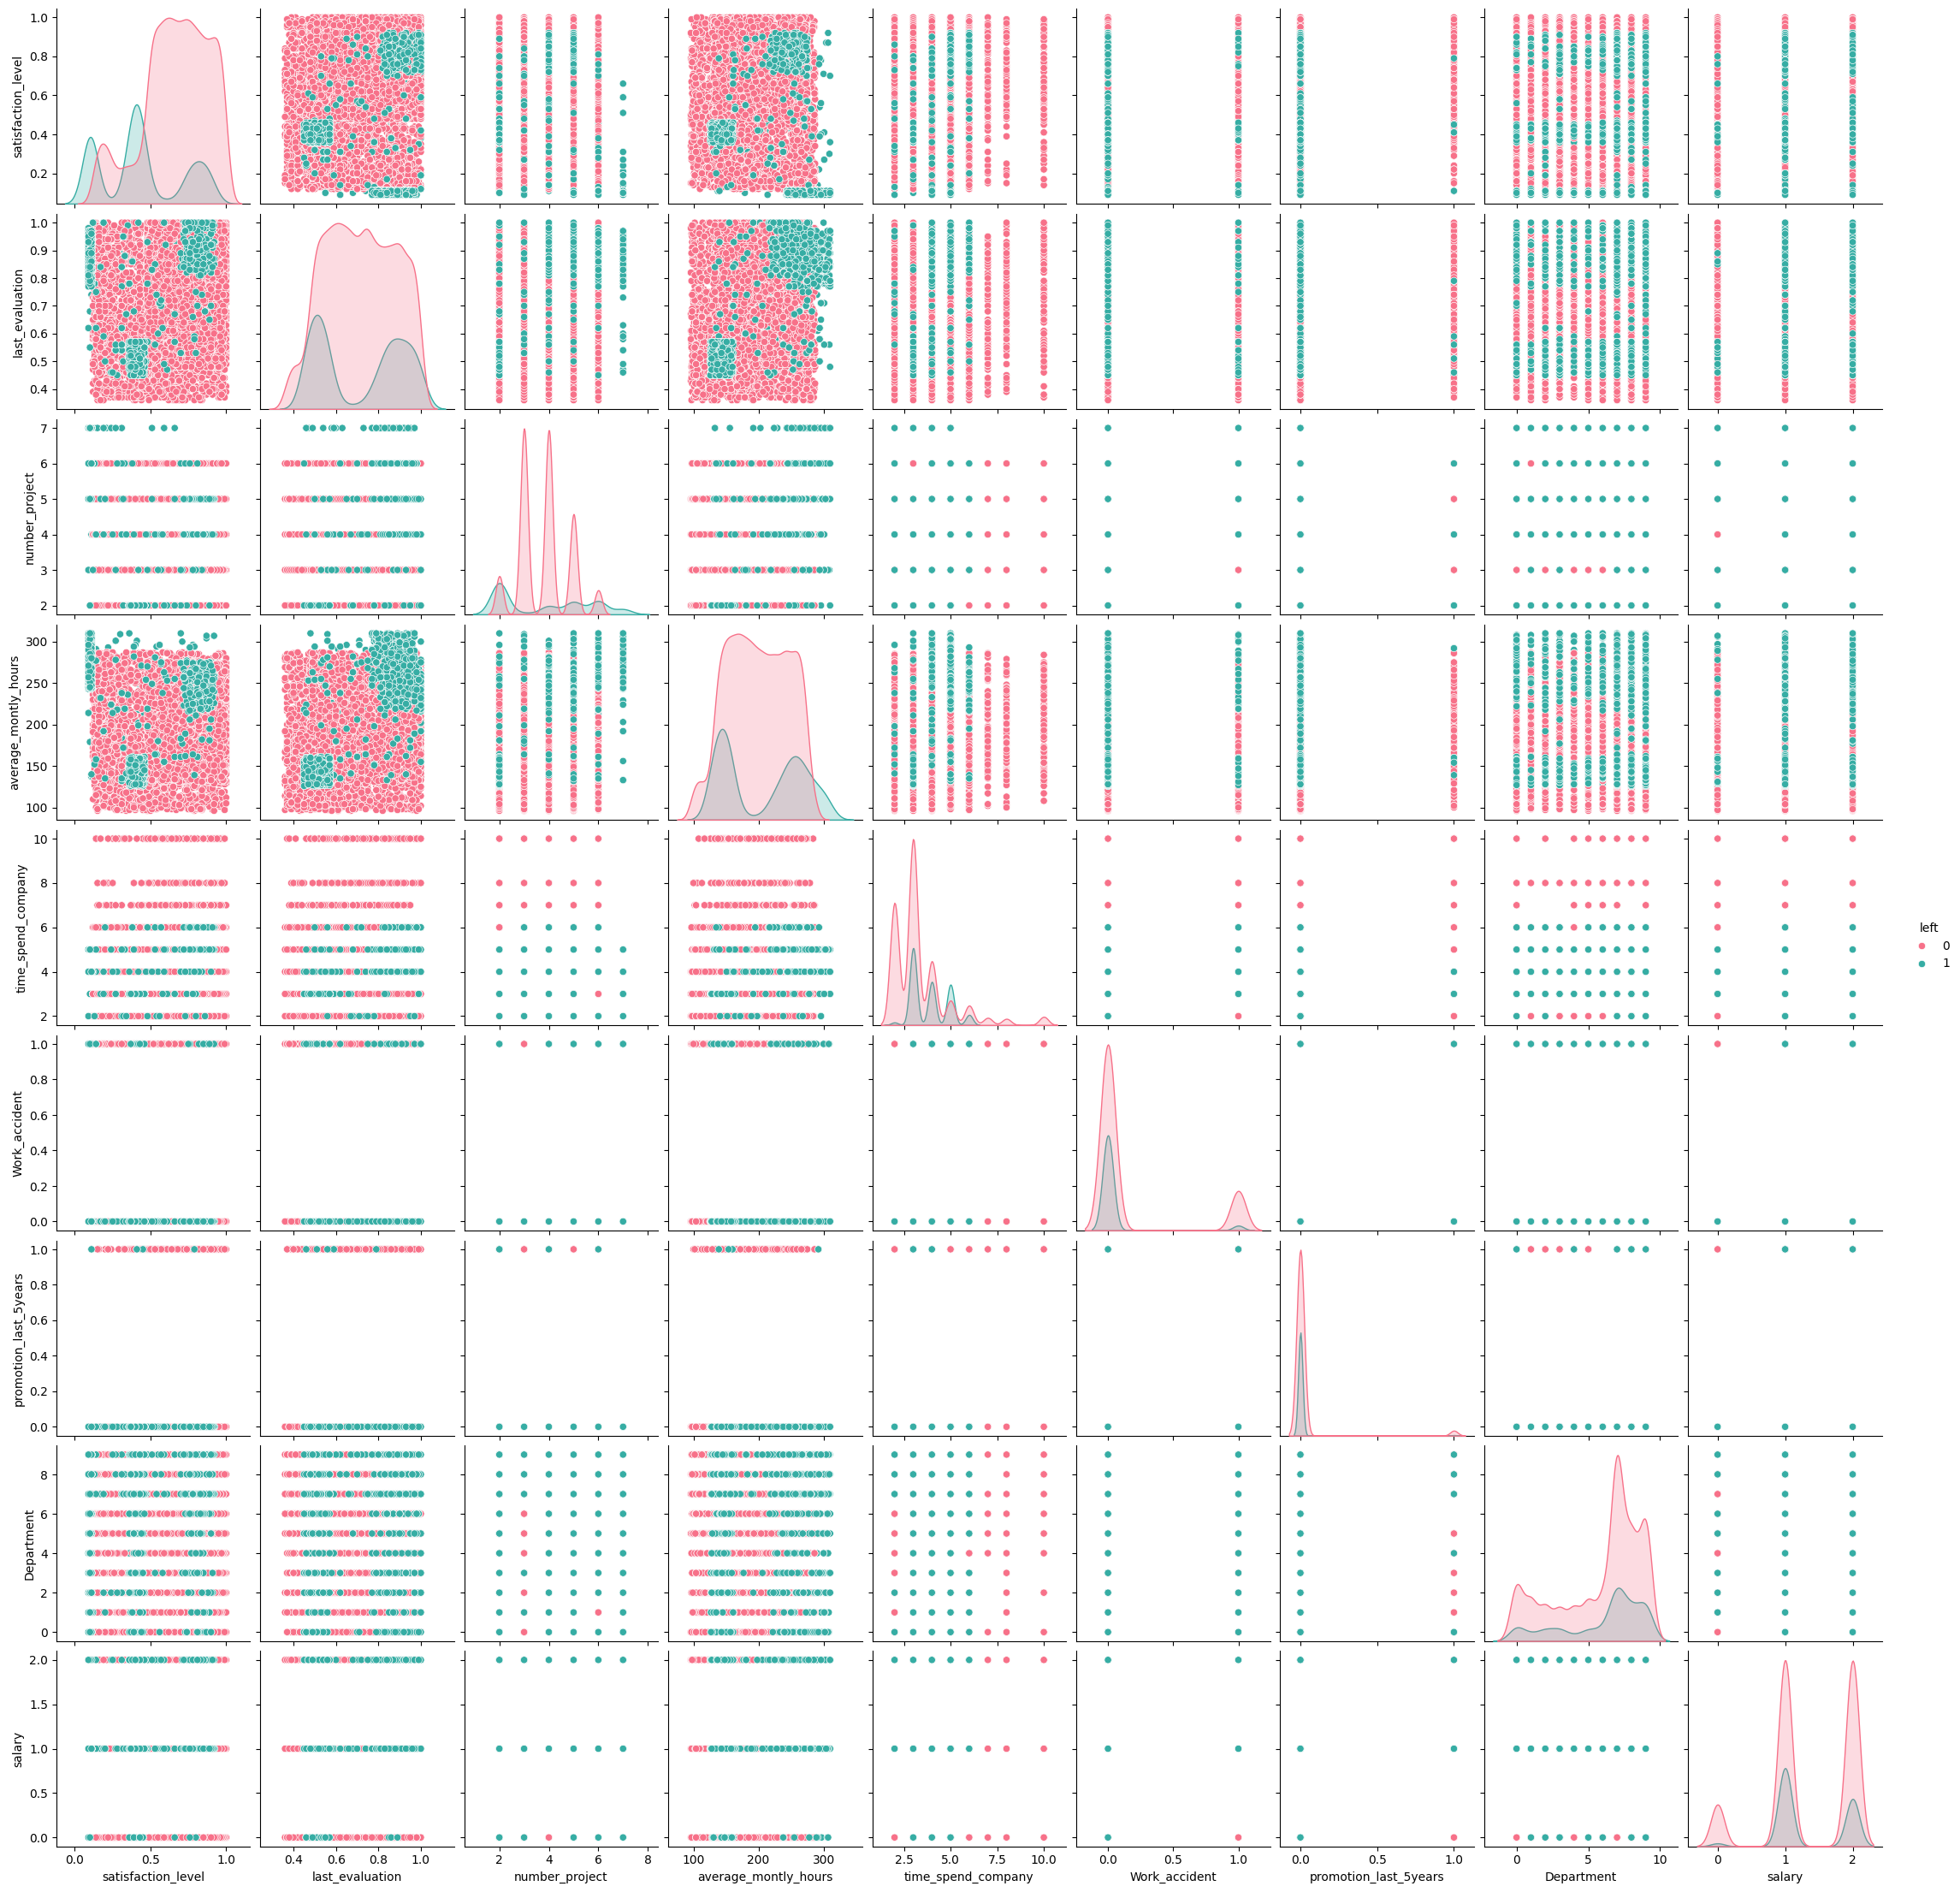

In [11]:
# making pairplot
sns.pairplot(df, hue='left', palette="husl")

### Correlation Analysis

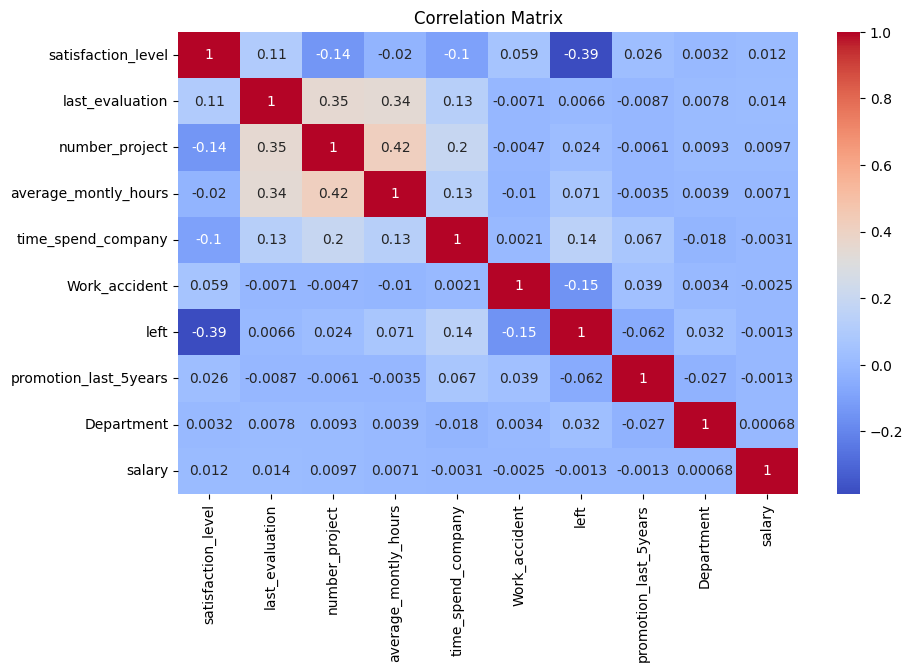

In [12]:
# Calculating the Correlation 
correlation = df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

___
## <span style="color:blue;">Model Development</span>
___

### Scikit-learn Logistic Regression:

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


# Define features and target
X = df.drop('left', axis=1)
y = df['left']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Evaluate the model
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')


Accuracy: 75.96%


Confusion Matrix:


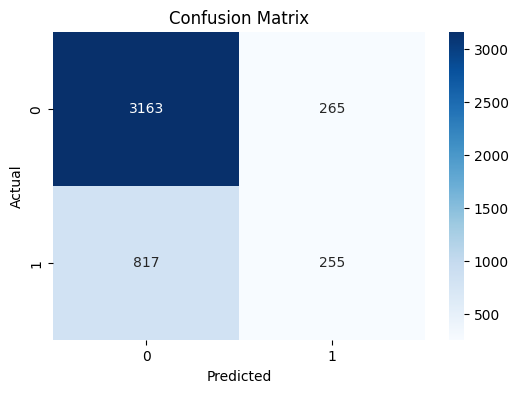

In [14]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')

# plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [15]:
# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:


              precision    recall  f1-score   support

           0       0.79      0.92      0.85      3428
           1       0.49      0.24      0.32      1072

    accuracy                           0.76      4500
   macro avg       0.64      0.58      0.59      4500
weighted avg       0.72      0.76      0.73      4500



### TensorFlow Logistic Regression:

In [17]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


# Define features and target
X = df.drop('left', axis=1)
y = df['left']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(X_train.shape[1],), activation='sigmoid')  # Use 'tanh' for tanh activation
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=2, batch_size=1, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

# Make predictions
y_prob = model.predict(X_test).flatten()
y_pred = (y_prob > 0.5).astype(int)

# Print the predicted probabilities and labels
print("Predicted probabilities:", y_prob)
print("Predicted labels:", y_pred)


c:\Users\Ahmad\anaconda3\envs\tf\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2
10499/10499 ━━━━━━━━━━━━━━━━━━━━ 9s 790us/step - accuracy: 0.6826 - loss: 0.5703
Epoch 2/2
10499/10499 ━━━━━━━━━━━━━━━━━━━━ 8s 782us/step - accuracy: 0.7666 - loss: 0.4503
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.7479 - loss: 0.4590
Accuracy: 75.84%
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Predicted probabilities: [0.04080458 0.05005582 0.18837976 ... 0.098278   0.04322633 0.02708378]
Predicted labels: [0 0 0 ... 0 0 0]


Confusion Matrix:


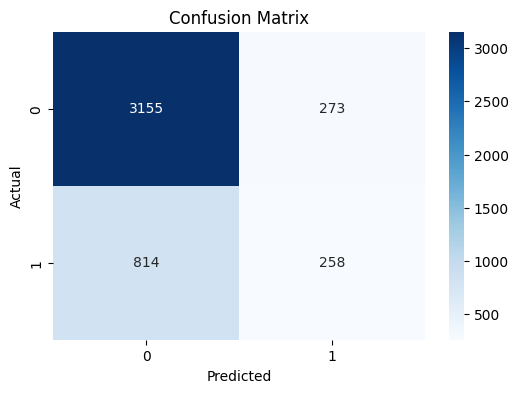

In [18]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')

# plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [19]:
# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      3428
           1       0.49      0.24      0.32      1072

    accuracy                           0.76      4500
   macro avg       0.64      0.58      0.59      4500
weighted avg       0.72      0.76      0.73      4500



___
## <span style="color:blue;">CONCLUSION</span>

___

### Summary of Findings
In this analysis, we explored the use of Logistic Regression for predicting whether an employee will leave a company based on several features, including satisfaction level, last evaluation score, number of projects, average monthly hours, time spent at the company, work accident occurrence, promotion in the last five years, department, and salary level. The key findings are as follows:

1. **Data Characteristics**:
   - The dataset is clean with no missing values.
   - The data includes both numerical and categorical features, which were converted to numerical for modeling purposes.
   
2. **Exploratory Data Analysis**:
   - Histograms, box plots, and violin plots revealed the distribution and spread of the data.
   - A correlation matrix highlighted relationships between variables, helping to identify potential predictors for the target variable.

3. **Model Performance**:
   - **Scikit-learn Logistic Regression**:
     - Achieved an accuracy of 75.96%.
     - Confusion Matrix indicated a higher precision for predicting employees who did not leave but lower recall for those who did leave.
     - Classification Report showed a weighted average F1-score of 0.73, indicating moderate model performance.
     - ROC Curve analysis resulted in an AUC of 0.76, suggesting reasonable discriminative ability.
   - **TensorFlow Logistic Regression**:
     - Achieved an accuracy of 76.00%.
     - Similar performance metrics to the Scikit-learn model, indicating consistent results across different implementations.

### Insights and Recommendations
- The model performed moderately well in predicting employee turnover, with accuracy and AUC scores around 76%. However, it struggled with recall for employees who left, indicating that further model improvements or additional features might be necessary.
- For better performance, consider:
  - Including additional relevant features that might influence employee turnover.
  - Applying more complex models like Random Forest, Gradient Boosting, or Neural Networks.
  - Conducting feature engineering to derive new variables from existing ones.
  - Regularizing the model to prevent overfitting and improve generalization.

### Acknowledgements
- **Data Source**: The dataset used in this analysis is publicly available on [kaggle](https://www.kaggle.com/datasets/manidevesh/hr-dataset-analysis) and contains comprehensive information on employee attributes related to turnover.
- **Tools and Libraries**: The analysis was conducted using Python, with libraries including Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, and TensorFlow.

This concludes our analysis of employee turnover prediction using Logistic Regression. Further exploration and model refinement could lead to even better predictive performance.
